# USOPC Performance Data Analyst Coding Exercise
Abigail Snyder

In [397]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score

### Data Loading & EDA

In [398]:
wellness = pd.read_excel("Wellness Load and Results Data.xlsx", sheet_name=0)

In [399]:
wellness.head()

,Date,Athlete,Gender,Fatigue,Soreness,Motivation,Resting HR,Sleep Hours,Sleep Quality,Stress,Travel Hours,Sport Specific Training Volume
0,2023-05-05,Athlete 1,m,47,30,31,0,8.50,61,39,NaN,NaN
1,2023-05-05,Athlete 2,m,27,54,47,68,7.00,33,59,NaN,NaN
2,2023-05-05,Athlete 3,m,35,36,90,65,7.25,94,32,NaN,NaN
3,2023-05-05,Athlete 4,m,55,1,84,58,7.00,64,0,NaN,NaN
4,2023-05-05,Athlete 5,m,50,67,74,80,6.25,73,40,NaN,NaN


In [400]:
wellness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            688 non-null    datetime64[ns]
 1   Athlete                         688 non-null    object        
 2   Gender                          688 non-null    object        
 3   Fatigue                         688 non-null    int64         
 4   Soreness                        688 non-null    int64         
 5   Motivation                      688 non-null    int64         
 6   Resting HR                      688 non-null    int64         
 7   Sleep Hours                     688 non-null    float64       
 8   Sleep Quality                   688 non-null    int64         
 9   Stress                          688 non-null    int64         
 10  Travel Hours                    107 non-null    float64       
 11  Sport 

In [401]:
wellness.dtypes

Date                              datetime64[ns]
Athlete                                   object
Gender                                    object
Fatigue                                    int64
Soreness                                   int64
Motivation                                 int64
Resting HR                                 int64
Sleep Hours                              float64
Sleep Quality                              int64
Stress                                     int64
Travel Hours                             float64
Sport Specific Training Volume            object
dtype: object

In [402]:
wellness.describe()

,Date,Fatigue,Soreness,Motivation,Resting HR,Sleep Hours,Sleep Quality,Stress,Travel Hours
count,688,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,107.000000
mean,2023-07-02 20:26:30.697674496,35.997093,31.453488,62.681686,56.443314,7.522892,63.867733,26.031977,8.042056
min,2023-05-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2023-05-30 00:00:00,19.000000,12.000000,48.000000,56.000000,7.000000,51.000000,0.000000,3.250000
50%,2023-06-26 12:00:00,34.000000,31.000000,66.000000,60.000000,7.750000,65.000000,24.000000,6.500000
75%,2023-08-05 06:00:00,51.000000,48.000000,86.000000,63.000000,8.250000,78.000000,44.000000,10.875000
max,2023-09-20 00:00:00,100.000000,100.000000,100.000000,90.000000,13.000000,100.000000,100.000000,20.000000
std,NaN,22.643236,22.685384,28.535054,16.122339,1.490790,21.084393,23.824299,5.563154


In [403]:
wellness.isnull().sum()

Date                                0
Athlete                             0
Gender                              0
Fatigue                             0
Soreness                            0
Motivation                          0
Resting HR                          0
Sleep Hours                         0
Sleep Quality                       0
Stress                              0
Travel Hours                      581
Sport Specific Training Volume    342
dtype: int64

In [404]:
results = pd.read_excel("Wellness Load and Results Data.xlsx", sheet_name=1)

In [405]:
results.head()

,Date,Athlete,Event,Time: Athlete,Time: Best,Rank: Athlete,Time: Athlete Heat 1,Time: Best Heat 1,Split Time: Athlete Heat 1,Split Rank: Athlete Heat 1,Time: Athlete Heat 2,Time: Best Heat 2,Split Time: Athlete Heat 2,Split Rank: Athlete Heat 2
0,2023-05-19,Athlete 2,Men's,342.36,334.17,10,171.48,166.32,14.70,3,170.88,167.85,14.76,2.0
1,2023-05-19,Athlete 4,Men's,355.50,334.17,16,179.97,166.32,14.67,2,175.53,167.85,15.03,6.0
2,2023-05-19,Athlete 7,Men's,340.11,334.17,3,170.01,166.32,15.03,10,170.10,167.85,15.06,7.0
3,2023-05-20,Athlete 2,Men's,340.08,337.86,3,169.80,169.08,14.94,2,170.28,168.42,14.97,3.0
4,2023-05-20,Athlete 4,Men's,351.51,337.86,14,174.24,169.08,14.97,3,177.27,168.42,15.18,9.0


In [406]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        77 non-null     datetime64[ns]
 1   Athlete                     77 non-null     object        
 2   Event                       77 non-null     object        
 3   Time: Athlete               65 non-null     float64       
 4   Time: Best                  77 non-null     float64       
 5   Rank: Athlete               77 non-null     int64         
 6   Time: Athlete Heat 1        77 non-null     float64       
 7   Time: Best Heat 1           77 non-null     float64       
 8   Split Time: Athlete Heat 1  77 non-null     float64       
 9   Split Rank: Athlete Heat 1  77 non-null     int64         
 10  Time: Athlete Heat 2        63 non-null     float64       
 11  Time: Best Heat 2           63 non-null     float64       
 

In [407]:
results.dtypes

Date                          datetime64[ns]
Athlete                               object
Event                                 object
Time: Athlete                        float64
Time: Best                           float64
Rank: Athlete                          int64
Time: Athlete Heat 1                 float64
Time: Best Heat 1                    float64
Split Time: Athlete Heat 1           float64
Split Rank: Athlete Heat 1             int64
Time: Athlete Heat 2                 float64
Time: Best Heat 2                    float64
Split Time: Athlete Heat 2           float64
Split Rank: Athlete Heat 2           float64
dtype: object

In [408]:
results.describe()

,Date,Time: Athlete,Time: Best,Rank: Athlete,Time: Athlete Heat 1,Time: Best Heat 1,Split Time: Athlete Heat 1,Split Rank: Athlete Heat 1,Time: Athlete Heat 2,Time: Best Heat 2,Split Time: Athlete Heat 2,Split Rank: Athlete Heat 2
count,77,65.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,63.000000,63.000000,63.000000,63.000000
mean,2023-07-13 13:05:27.272727296,327.451385,322.274416,17.142857,167.005714,162.456623,15.147662,12.259740,166.297143,162.534286,15.144762,10.253968
min,2023-05-19 00:00:00,162.060000,159.360000,2.000000,98.190000,96.360000,12.930000,2.000000,98.640000,96.390000,12.810000,1.000000
25%,2023-06-11 00:00:00,319.680000,309.360000,12.000000,160.260000,154.920000,14.550000,4.000000,160.335000,155.835000,14.490000,4.000000
50%,2023-07-14 00:00:00,334.560000,326.070000,16.000000,167.070000,162.210000,15.000000,13.000000,167.640000,163.740000,15.060000,9.000000
75%,2023-08-12 00:00:00,350.010000,337.860000,23.000000,174.690000,169.080000,15.570000,17.000000,175.035000,170.655000,15.585000,15.000000
max,2023-09-08 00:00:00,422.490000,462.210000,42.000000,212.220000,209.430000,19.230000,33.000000,210.270000,206.400000,18.960000,23.000000
std,NaN,48.473188,46.548975,8.690155,18.875922,18.046627,0.982722,7.946205,19.271086,19.024222,1.047405,6.638034


In [409]:
results.isnull().sum()

Date                           0
Athlete                        0
Event                          0
Time: Athlete                 12
Time: Best                     0
Rank: Athlete                  0
Time: Athlete Heat 1           0
Time: Best Heat 1              0
Split Time: Athlete Heat 1     0
Split Rank: Athlete Heat 1     0
Time: Athlete Heat 2          14
Time: Best Heat 2             14
Split Time: Athlete Heat 2    14
Split Rank: Athlete Heat 2    14
dtype: int64

#### For a specific athlete, what data is observed?

In [410]:
athlete_2 = wellness[wellness['Athlete'] == 'Athlete 2']

In [411]:
athlete_2

,Date,Athlete,Gender,Fatigue,Soreness,Motivation,Resting HR,Sleep Hours,Sleep Quality,Stress,Travel Hours,Sport Specific Training Volume
1,2023-05-05,Athlete 2,m,27,54,47,68,7.00,33,59,NaN,NaN
7,2023-05-06,Athlete 2,m,42,57,48,62,8.00,69,43,NaN,NaN
14,2023-05-07,Athlete 2,m,38,28,42,67,8.00,67,18,NaN,NaN
20,2023-05-08,Athlete 2,m,14,0,66,66,7.00,37,27,NaN,NaN
26,2023-05-09,Athlete 2,m,40,10,49,62,8.00,52,48,NaN,NaN
34,2023-05-10,Athlete 2,m,61,41,69,66,7.25,25,64,NaN,NaN
40,2023-05-11,Athlete 2,m,83,100,16,67,7.25,51,51,NaN,Moderate
47,2023-05-12,Athlete 2,m,78,100,14,68,8.50,100,68,NaN,High
53,2023-05-13,Athlete 2,m,51,84,21,62,7.75,51,12,NaN,Low
60,2023-05-14,Athlete 2,m,61,66,36,60,8.25,87,34,NaN,NaN


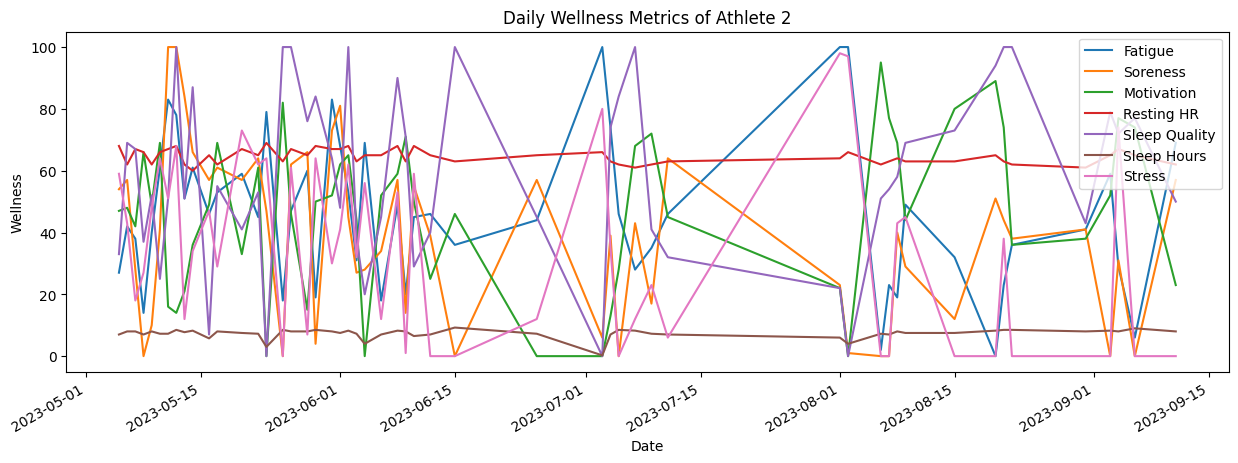

In [412]:
# Plot the wellness metrics
athlete_2.plot(x='Date', y=['Fatigue', 'Soreness', 'Motivation', 'Resting HR', 'Sleep Quality', 'Sleep Hours', 'Stress'], figsize=(15,5))

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Wellness')

# Set the title of the plot
plt.title('Daily Wellness Metrics of Athlete 2')

# Display the plot
plt.show()

<Axes: >

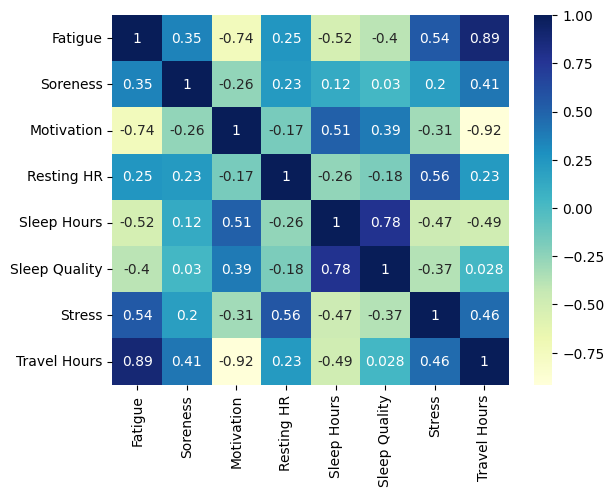

In [413]:
sns.heatmap(athlete_2.corr(numeric_only=True), cmap="YlGnBu", annot=True) 

#### Join both dataframes to keep all data for all events & athletes (outer join)

In [414]:
data = wellness.merge(results, on=['Date', 'Athlete'], how='outer')

In [415]:
data.head()

,Date,Athlete,Gender,Fatigue,Soreness,Motivation,Resting HR,Sleep Hours,Sleep Quality,Stress,...,Time: Best,Rank: Athlete,Time: Athlete Heat 1,Time: Best Heat 1,Split Time: Athlete Heat 1,Split Rank: Athlete Heat 1,Time: Athlete Heat 2,Time: Best Heat 2,Split Time: Athlete Heat 2,Split Rank: Athlete Heat 2
0,2023-05-05,Athlete 1,m,47.0,30.0,31.0,0.0,8.50,61.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-05,Athlete 2,m,27.0,54.0,47.0,68.0,7.00,33.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-05-05,Athlete 3,m,35.0,36.0,90.0,65.0,7.25,94.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-05-05,Athlete 4,m,55.0,1.0,84.0,58.0,7.00,64.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-05-05,Athlete 5,m,50.0,67.0,74.0,80.0,6.25,73.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


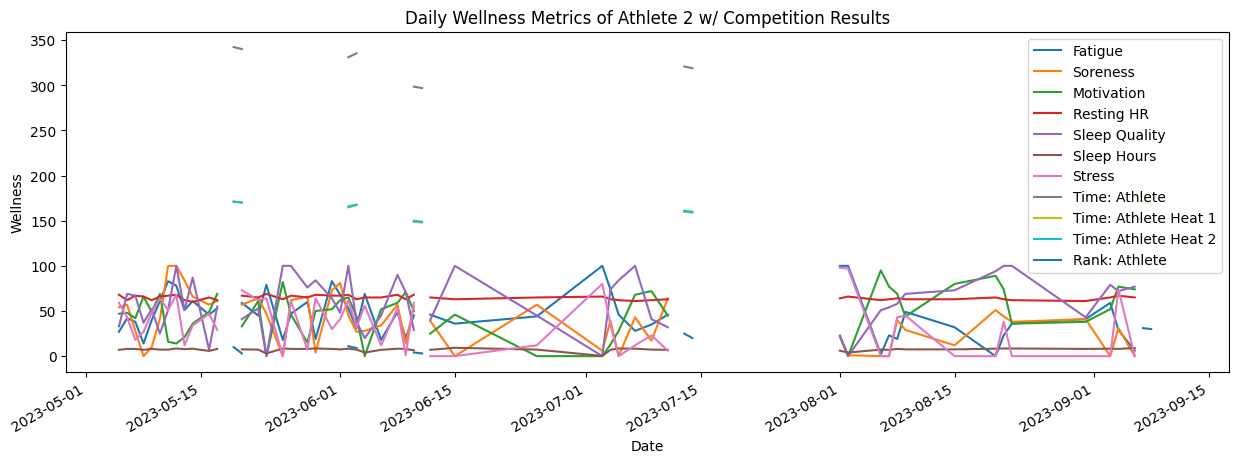

In [418]:
athlete_2 = data[data['Athlete'] == 'Athlete 2']

# Plot the wellness metrics
athlete_2.plot(x='Date', y=['Fatigue', 'Soreness', 'Motivation', 'Resting HR', 'Sleep Quality', 'Sleep Hours', 'Stress', 'Time: Athlete', 'Time: Athlete Heat 1', 'Time: Athlete Heat 2', 'Rank: Athlete'], figsize=(15,5))

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Wellness')

# Set the title of the plot
plt.title('Daily Wellness Metrics of Athlete 2 w/ Competition Results')

# Display the plot
plt.show()

<Axes: >

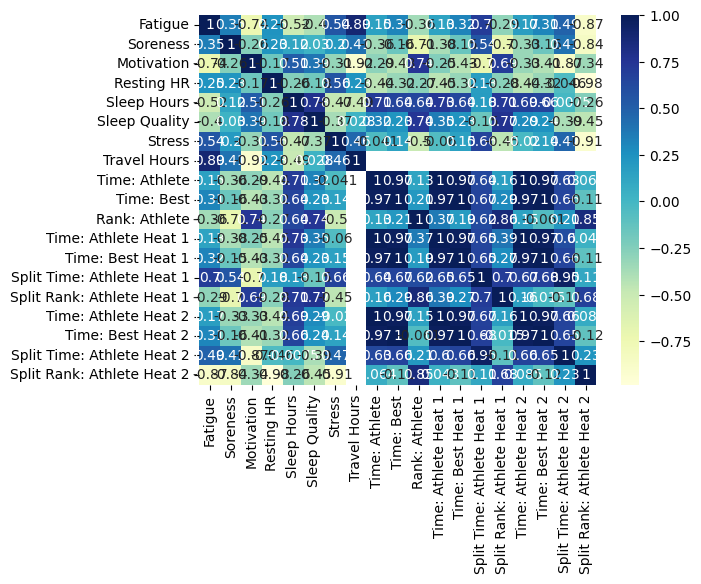

In [419]:
sns.heatmap(athlete_2.corr(numeric_only=True), cmap="YlGnBu", annot=True) 

With varying terrain/length/course conditions, as well as the potential variance of other variables outside of the athlete's individual wellness and performance (what competitors are there, their performance, etc.), the confidence of any conclusions drawn from the result data is limited. 

For example, any correlation between wellness factors and improved (reduced) times may be incorrect, as the duration/distance of the course may be more a factor in athlete times across events than are the wellness metrics. If we choose to use ranking instead, improvements in ranking may also be more a factor of what other athletes competed and their resulting performances than a representation of "Athlete 2's" wellness metrics. 

However, with these limitations in mind...what wellness metrics could potentially be used to predict an athlete's performance (by rank or time) in an event?

#### For Athlete 2:

In [420]:
corr_matrix = athlete_2.corr(numeric_only=True)
corr_matrix['Rank: Athlete'].sort_values(ascending=False)

Rank: Athlete                 1.000000
Split Rank: Athlete Heat 1    0.863119
Split Rank: Athlete Heat 2    0.850120
Sleep Quality                 0.737782
Motivation                    0.737459
Sleep Hours                   0.642794
Split Time: Athlete Heat 1    0.619287
Time: Athlete Heat 1          0.369432
Time: Best                    0.209201
Split Time: Athlete Heat 2    0.208182
Time: Best Heat 1             0.192826
Time: Athlete Heat 2          0.146348
Time: Athlete                 0.132303
Time: Best Heat 2            -0.060683
Resting HR                   -0.271919
Fatigue                      -0.356326
Stress                       -0.498296
Soreness                     -0.711283
Travel Hours                       NaN
Name: Rank: Athlete, dtype: float64

In [421]:
corr_matrix['Time: Athlete'].sort_values(ascending=False)

Time: Athlete                 1.000000
Time: Athlete Heat 1          0.999270
Time: Athlete Heat 2          0.999156
Time: Best Heat 2             0.974696
Time: Best                    0.973636
Time: Best Heat 1             0.971549
Sleep Hours                   0.710950
Split Time: Athlete Heat 1    0.643608
Split Time: Athlete Heat 2    0.630583
Sleep Quality                 0.320172
Split Rank: Athlete Heat 1    0.161461
Fatigue                       0.150024
Rank: Athlete                 0.132303
Split Rank: Athlete Heat 2    0.063560
Stress                       -0.041005
Motivation                   -0.288759
Soreness                     -0.357235
Resting HR                   -0.443148
Travel Hours                       NaN
Name: Time: Athlete, dtype: float64

#### For all athletes:

In [422]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['Rank: Athlete'].sort_values(ascending=False)

Rank: Athlete                 1.000000
Split Rank: Athlete Heat 1    0.592624
Split Rank: Athlete Heat 2    0.583739
Stress                        0.395331
Motivation                    0.335443
Sleep Quality                 0.324928
Split Time: Athlete Heat 2    0.119892
Time: Athlete Heat 1          0.088981
Time: Best                    0.083130
Time: Athlete                 0.057400
Split Time: Athlete Heat 1    0.040761
Time: Athlete Heat 2          0.039888
Sleep Hours                   0.034895
Time: Best Heat 1             0.011373
Resting HR                   -0.001620
Time: Best Heat 2            -0.005163
Soreness                     -0.329040
Fatigue                      -0.562172
Travel Hours                       NaN
Name: Rank: Athlete, dtype: float64

In [423]:
corr_matrix['Time: Athlete'].sort_values(ascending=False)

Time: Athlete                 1.000000
Time: Athlete Heat 2          0.998536
Time: Best                    0.996301
Time: Best Heat 2             0.993916
Time: Athlete Heat 1          0.807309
Time: Best Heat 1             0.795826
Split Time: Athlete Heat 2    0.595801
Split Time: Athlete Heat 1    0.395425
Stress                        0.220491
Motivation                    0.181881
Split Rank: Athlete Heat 1    0.122185
Sleep Quality                 0.102630
Rank: Athlete                 0.057400
Resting HR                    0.024302
Split Rank: Athlete Heat 2    0.018976
Fatigue                      -0.059377
Sleep Hours                  -0.182302
Soreness                     -0.289720
Travel Hours                       NaN
Name: Time: Athlete, dtype: float64

As a cyclist, I also know that some training platforms (Training Peaks) have a metric (TSS) based on power, that, when exponentially calculated over time, can be used to measure chronic training load (CTL), acute training load (ATL), and training stress balance (TSB), also sometimes referred to as form. While this dataset does not include TSS, I thought perhaps a variation of these metrics could be calculated to help measure the cumulative training load of athletes leading up to competition.

Though fatigue is self-reported here by the athlete, my thought was to use the fatigue metric, exponentially weighted, with the starting values used by Training Peaks in calculating their CTL from TSS (42). 

In [424]:
def calc_ctl(Fatigue:list, start_ctl, exponent):
    ctl = [start_ctl]
    for i in range(len(Fatigue)):
        ctl_value = Fatigue[i] * (1 - math.exp(-1 / exponent)) + ctl[-1] * math.exp(-1 / exponent)
        ctl.append(ctl_value)
    return ctl[:-1]

def calculate_metrics_for_dataframe(data, start_ctl, ctl_exponent, start_atl, atl_exponent):
    metrics_by_athlete = {}
    for athlete in data['Athlete'].unique():
        athlete_df = data[data['Athlete'] == athlete].copy()
        Fatigue_values = athlete_df['Fatigue'].tolist()
        ctl_values = calc_ctl(Fatigue_values, start_ctl, ctl_exponent)
        atl_values = calc_ctl(Fatigue_values, start_atl, atl_exponent)
        tsb_values = [ctl - atl for ctl, atl in zip(ctl_values, atl_values)]
        metrics_by_athlete[athlete] = {'CTL': ctl_values, 'ATL': atl_values, 'TSB': tsb_values}
        athlete_df['CTL'] = ctl_values
        athlete_df['ATL'] = atl_values
        athlete_df['TSB'] = tsb_values
        data.loc[athlete_df.index, ['CTL', 'ATL', 'TSB']] = athlete_df[['CTL', 'ATL', 'TSB']].values
    return metrics_by_athlete, data

start_ctl = 103
ctl_exponent = 42
start_atl = 50
atl_exponent = 7

metrics_by_athlete, df_with_metrics = calculate_metrics_for_dataframe(data, start_ctl, ctl_exponent, start_atl, atl_exponent)

df_with_metrics.head()

,Date,Athlete,Gender,Fatigue,Soreness,Motivation,Resting HR,Sleep Hours,Sleep Quality,Stress,...,Time: Best Heat 1,Split Time: Athlete Heat 1,Split Rank: Athlete Heat 1,Time: Athlete Heat 2,Time: Best Heat 2,Split Time: Athlete Heat 2,Split Rank: Athlete Heat 2,CTL,ATL,TSB
0,2023-05-05,Athlete 1,m,47.0,30.0,31.0,0.0,8.50,61.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,50.0,53.0
1,2023-05-05,Athlete 2,m,27.0,54.0,47.0,68.0,7.00,33.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,50.0,53.0
2,2023-05-05,Athlete 3,m,35.0,36.0,90.0,65.0,7.25,94.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,50.0,53.0
3,2023-05-05,Athlete 4,m,55.0,1.0,84.0,58.0,7.00,64.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,50.0,53.0
4,2023-05-05,Athlete 5,m,50.0,67.0,74.0,80.0,6.25,73.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,50.0,53.0


In [425]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['Rank: Athlete'].sort_values(ascending=False)

Rank: Athlete                 1.000000
Split Rank: Athlete Heat 1    0.592624
Split Rank: Athlete Heat 2    0.583739
Stress                        0.395331
Motivation                    0.335443
Sleep Quality                 0.324928
Split Time: Athlete Heat 2    0.119892
Time: Athlete Heat 1          0.088981
Time: Best                    0.083130
Time: Athlete                 0.057400
Split Time: Athlete Heat 1    0.040761
Time: Athlete Heat 2          0.039888
Sleep Hours                   0.034895
Time: Best Heat 1             0.011373
Resting HR                   -0.001620
Time: Best Heat 2            -0.005163
Soreness                     -0.329040
TSB                          -0.401635
ATL                          -0.439617
Fatigue                      -0.562172
CTL                          -0.612215
Travel Hours                       NaN
Name: Rank: Athlete, dtype: float64

In [426]:
corr_matrix['Time: Athlete'].sort_values(ascending=False)

Time: Athlete                 1.000000
Time: Athlete Heat 2          0.998536
Time: Best                    0.996301
Time: Best Heat 2             0.993916
Time: Athlete Heat 1          0.807309
Time: Best Heat 1             0.795826
Split Time: Athlete Heat 2    0.595801
Split Time: Athlete Heat 1    0.395425
Stress                        0.220491
Motivation                    0.181881
Split Rank: Athlete Heat 1    0.122185
Sleep Quality                 0.102630
Rank: Athlete                 0.057400
TSB                           0.029144
Resting HR                    0.024302
Split Rank: Athlete Heat 2    0.018976
CTL                          -0.047689
Fatigue                      -0.059377
ATL                          -0.101475
Sleep Hours                  -0.182302
Soreness                     -0.289720
Travel Hours                       NaN
Name: Time: Athlete, dtype: float64

Now, I wanted to attempt to predict both Time and Rank based on these wellness metrics. 

In order to do this, I aggregated the mean of the previous 7 day's fitness metrics (Stress, Motivation, Sleep Quality, Resting HR, Fatigue, Sleep Hours, Soreness, ATL, and CTL), as well as the prior day's TSB for each athlete's event date. 

In [427]:
data['Event_binary'] = 0

# Set Event_binary to 1 where 'Time: Athlete' is not NaN
# Also set the 'Athlete' column to the corresponding athlete for those rows
athletes_competing = data.loc[data['Rank: Athlete'].notna(), 'Athlete'].unique()
for athlete in athletes_competing:
    data.loc[(data['Athlete'] == athlete) & (data['Rank: Athlete'].notna()), 'Event_binary'] = 1

In [428]:
data.describe()

,Date,Fatigue,Soreness,Motivation,Resting HR,Sleep Hours,Sleep Quality,Stress,Travel Hours,Time: Athlete,...,Split Time: Athlete Heat 1,Split Rank: Athlete Heat 1,Time: Athlete Heat 2,Time: Best Heat 2,Split Time: Athlete Heat 2,Split Rank: Athlete Heat 2,CTL,ATL,TSB,Event_binary
count,716,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,107.000000,65.000000,...,77.000000,77.000000,63.000000,63.000000,63.000000,63.000000,695.000000,695.000000,695.000000,716.000000
mean,2023-07-03 23:15:45.251396864,35.997093,31.453488,62.681686,56.443314,7.522892,63.867733,26.031977,8.042056,327.451385,...,15.147662,12.259740,166.297143,162.534286,15.144762,10.253968,63.927275,37.427185,26.500090,0.107542
min,2023-05-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,162.060000,...,12.930000,2.000000,98.640000,96.390000,12.810000,1.000000,22.059828,10.715332,-7.373286,0.000000
25%,2023-05-31 00:00:00,19.000000,12.000000,48.000000,56.000000,7.000000,51.000000,0.000000,3.250000,319.680000,...,14.550000,4.000000,160.335000,155.835000,14.490000,4.000000,46.961071,29.296511,14.997989,0.000000
50%,2023-06-29 00:00:00,34.000000,31.000000,66.000000,60.000000,7.750000,65.000000,24.000000,6.500000,334.560000,...,15.000000,13.000000,167.640000,163.740000,15.060000,9.000000,64.071416,39.660157,26.248619,0.000000
75%,2023-08-06 00:00:00,51.000000,48.000000,86.000000,63.000000,8.250000,78.000000,44.000000,10.875000,350.010000,...,15.570000,17.000000,175.035000,170.655000,15.585000,15.000000,79.599178,47.046553,36.015848,0.000000
max,2023-09-20 00:00:00,100.000000,100.000000,100.000000,90.000000,13.000000,100.000000,100.000000,20.000000,422.490000,...,19.230000,33.000000,210.270000,206.400000,18.960000,23.000000,103.000000,63.613670,64.744556,1.000000
std,NaN,22.643236,22.685384,28.535054,16.122339,1.490790,21.084393,23.824299,5.563154,48.473188,...,0.982722,7.946205,19.271086,19.024222,1.047405,6.638034,20.331572,11.970982,14.684794,0.310018


In [429]:
data.to_csv('data.csv')

In [430]:
event_dates = data[data['Event_binary'] == 1]['Date']

In [431]:
# Initialize an empty list to store aggregated wellness data
aggregated_wellness_data = []

# Define the subset of columns to aggregate
columns_to_aggregate = ['Stress', 'Motivation', 'Sleep Quality', 'TSB', 'Resting HR', 
                        'CTL', 'Fatigue', 'ATL', 'Sleep Hours', 'Soreness']

# Iterate over each unique athlete
for athlete in data['Athlete'].unique():
    # Iterate over each event date where 'Event_binary' is 1 for this athlete
    for event_date in data[(data['Athlete'] == athlete) & (data['Event_binary'] == 1)]['Date'].unique():
        # Filter wellness data for the previous 7 days leading up to the event date for this athlete
        filtered_wellness_data = data[(data['Athlete'] == athlete) & 
                                      (data['Date'] >= event_date - pd.Timedelta(days=7)) & 
                                      (data['Date'] <= event_date - pd.Timedelta(days=1))]
        
        # Aggregate the subset of columns for this athlete and event date
        aggregated_data = filtered_wellness_data[columns_to_aggregate].mean().to_frame().T
        aggregated_data['Athlete'] = athlete
        aggregated_data['Date'] = event_date
        
        # Append the aggregated data to the list
        aggregated_wellness_data.append(aggregated_data)

# Concatenate the aggregated wellness data into a single DataFrame
aggregated_wellness_data = pd.concat(aggregated_wellness_data).reset_index(drop=True)

In [432]:
aggregated_wellness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Stress         69 non-null     float64       
 1   Motivation     69 non-null     float64       
 2   Sleep Quality  69 non-null     float64       
 3   TSB            69 non-null     float64       
 4   Resting HR     69 non-null     float64       
 5   CTL            69 non-null     float64       
 6   Fatigue        69 non-null     float64       
 7   ATL            69 non-null     float64       
 8   Sleep Hours    69 non-null     float64       
 9   Soreness       69 non-null     float64       
 10  Athlete        77 non-null     object        
 11  Date           77 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 7.3+ KB


In [433]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        77 non-null     datetime64[ns]
 1   Athlete                     77 non-null     object        
 2   Event                       77 non-null     object        
 3   Time: Athlete               65 non-null     float64       
 4   Time: Best                  77 non-null     float64       
 5   Rank: Athlete               77 non-null     int64         
 6   Time: Athlete Heat 1        77 non-null     float64       
 7   Time: Best Heat 1           77 non-null     float64       
 8   Split Time: Athlete Heat 1  77 non-null     float64       
 9   Split Rank: Athlete Heat 1  77 non-null     int64         
 10  Time: Athlete Heat 2        63 non-null     float64       
 11  Time: Best Heat 2           63 non-null     float64       
 

In [434]:
merged_data = pd.merge(aggregated_wellness_data, results, on=['Athlete', 'Date'], how='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Stress                      69 non-null     float64       
 1   Motivation                  69 non-null     float64       
 2   Sleep Quality               69 non-null     float64       
 3   TSB                         69 non-null     float64       
 4   Resting HR                  69 non-null     float64       
 5   CTL                         69 non-null     float64       
 6   Fatigue                     69 non-null     float64       
 7   ATL                         69 non-null     float64       
 8   Sleep Hours                 69 non-null     float64       
 9   Soreness                    69 non-null     float64       
 10  Athlete                     77 non-null     object        
 11  Date                        77 non-null     datetime64[ns]
 

In [435]:
merged_data.head()

,Stress,Motivation,Sleep Quality,TSB,Resting HR,CTL,Fatigue,ATL,Sleep Hours,Soreness,...,Time: Best,Rank: Athlete,Time: Athlete Heat 1,Time: Best Heat 1,Split Time: Athlete Heat 1,Split Rank: Athlete Heat 1,Time: Athlete Heat 2,Time: Best Heat 2,Split Time: Athlete Heat 2,Split Rank: Athlete Heat 2
0,17.200000,45.000000,48.600000,26.019460,12.000000,77.110130,50.000000,51.090670,7.300000,31.800000,...,314.52,12,159.57,157.68,14.61,4,158.07,156.84,14.52,4.0
1,36.166667,45.333333,46.833333,20.011457,10.666667,69.387753,46.833333,49.376296,6.875000,41.833333,...,337.47,8,170.52,167.49,14.64,2,168.84,168.60,14.64,3.0
2,33.166667,44.166667,51.833333,32.094611,29.333333,83.225232,50.833333,51.130621,7.583333,47.000000,...,361.83,15,184.56,180.45,16.98,4,183.33,180.78,16.77,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,402.21,20,206.40,201.00,14.52,9,203.70,201.09,14.46,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,308.55,15,155.88,154.02,14.31,12,155.76,154.23,13.95,2.0


In [436]:
# Create a boolean mask indicating where NaN values exist in merged_data
nan_mask = merged_data.isna().any(axis=1)

# Filter merged_data to show only rows with NaN values
rows_with_nan = merged_data[nan_mask]
rows_with_nan[['Athlete', 'Date']]

,Athlete,Date
3,Athlete 1,2023-07-14
4,Athlete 1,2023-07-28
7,Athlete 1,2023-09-07
16,Athlete 2,2023-09-07
17,Athlete 2,2023-09-08
24,Athlete 3,2023-08-04
25,Athlete 3,2023-08-18
26,Athlete 3,2023-09-08
34,Athlete 4,2023-07-14
37,Athlete 4,2023-09-07


In [437]:
merged_data_cleaned = merged_data.dropna()

In [438]:
merged_data_cleaned.to_csv('7_day_agg.csv')

In [439]:
X = merged_data_cleaned[['Stress', 'Motivation', 'Sleep Quality', 'TSB', 'Resting HR', 'CTL', 'Fatigue', 'ATL', 'Sleep Hours', 'Soreness']]
y = merged_data_cleaned['Rank: Athlete']

In [440]:
# Add constant to the model
X = sm.add_constant(X)

# Reset the indices of X and y to ensure alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Rank: Athlete   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     1.833
Date:                Thu, 21 Mar 2024   Prob (F-statistic):             0.0870
Time:                        19:39:51   Log-Likelihood:                -178.42
No. Observations:                  57   AIC:                             376.8
Df Residuals:                      47   BIC:                             397.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.5748     11.239      1.564

Here, the R-squared is 0.26, which indicate that only approximtely 26% of the variability in Athlete Rank can be explained by the 7-day aggregation of daily wellness metrics.

The F-statistic is 1.833 with a p-value of 0.08, which is over the standard significance level of 0.05, which would indicate that the model as a whole is not statistically significant. In addition, none of the individual coefficients are statistically significant when controlling for the other variables. 

In [441]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))

    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    #Add chart labels
    plt.title(model_type + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')

In [442]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=0, oob_score=True)

regressor.fit(X, y)

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.048086737035364036
Mean Squared Error: 10.004196731194025
R-squared: 0.7583983589304608


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


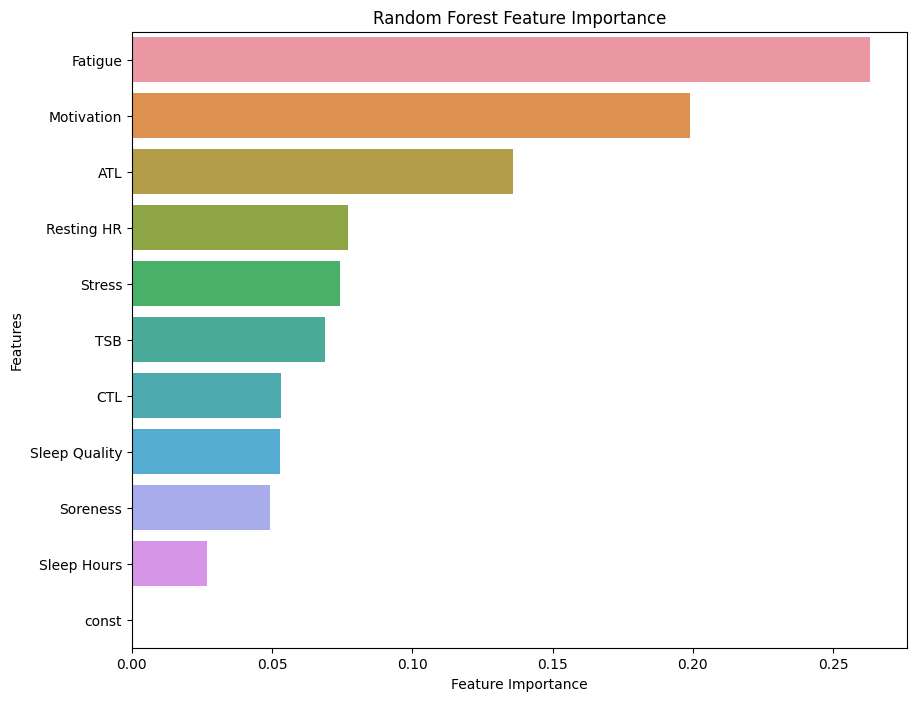

In [443]:
plot_feature_importance(regressor.feature_importances_,X.columns,'Random Forest ')

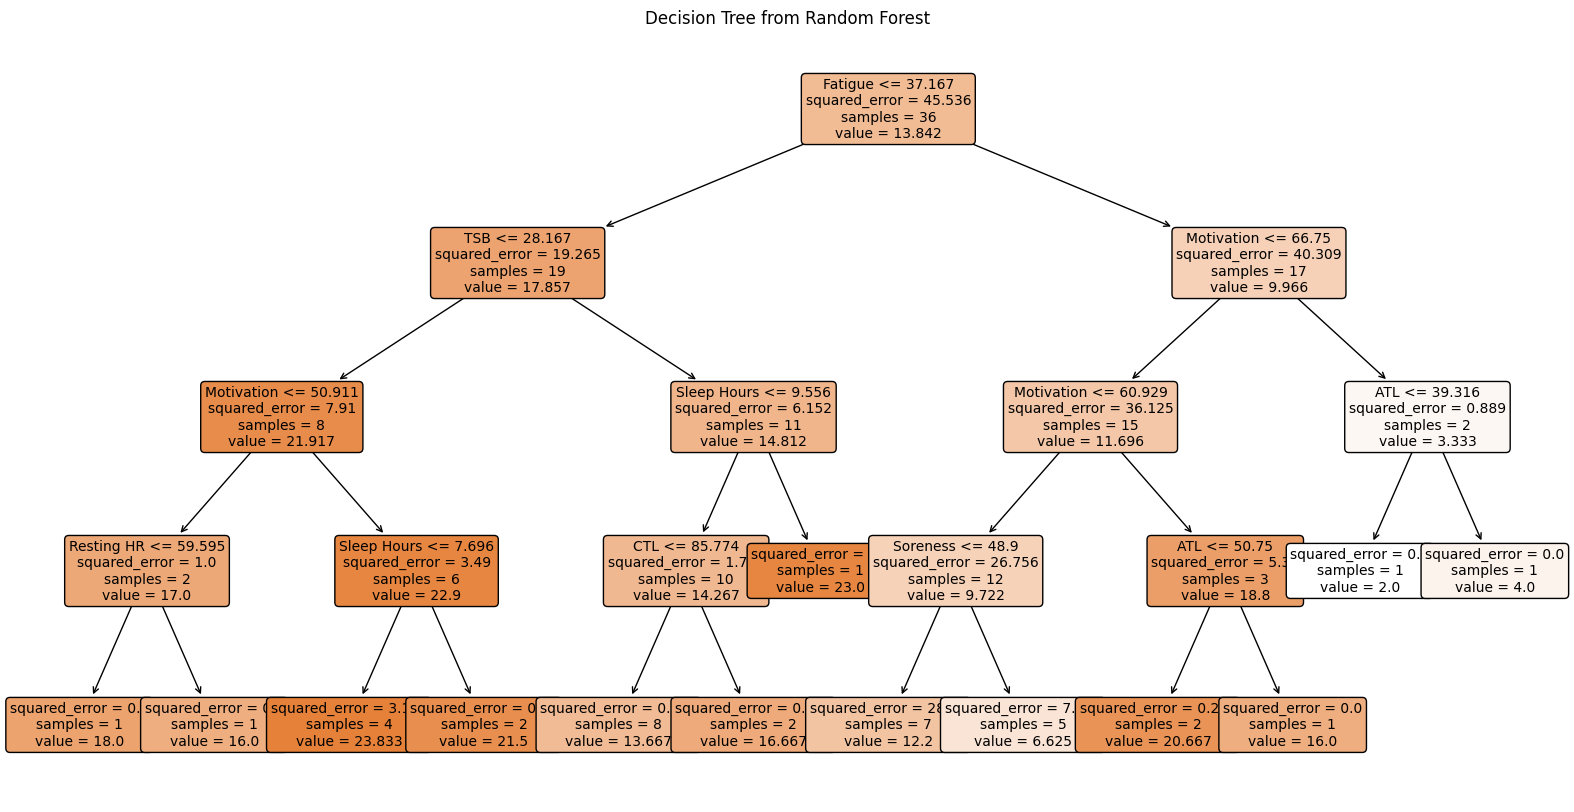

In [444]:
tree_to_plot = regressor.estimators_[0]
 
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

The random forest model, when compared to the multiple regression model, produces a higher R-squared, indicating that approximately 75% of the variance in Athlete Rank can be explained by the model. The Out-of-Bag (OOB) score is a measure of prediction accuracy, with the low score of 0.05 indicating that the model is only slightly better than simply predicting the mean of the target value.

That being said, the random forest model does indicate that fatigue, motivation, and ATL are the three most important features for predicting Athlete Rank. 

In [445]:
X = merged_data_cleaned[['Stress', 'Motivation', 'Sleep Quality', 'TSB', 'Resting HR', 'CTL', 'Fatigue', 'ATL', 'Sleep Hours', 'Soreness']]
y = merged_data_cleaned['Time: Athlete']

In [446]:
# Add constant to the model
X = sm.add_constant(X)

# Reset the indices of X and y to ensure alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Time: Athlete   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.336
Date:                Thu, 21 Mar 2024   Prob (F-statistic):              0.245
Time:                        19:40:03   Log-Likelihood:                -283.62
No. Observations:                  57   AIC:                             587.2
Df Residuals:                      47   BIC:                             607.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           398.8362     71.155      5.605

Here, the R-squared is 0.20, which indicate that only 20% of the variability in Athlete Rank can be explained by the 7-day aggregation of daily wellness metrics.

The F-statistic is 1.336 with a p-value of 0.245, which is over the standard significance level of 0.05, which would indicate that the model as a whole is not statistically significant. 

Of all of the individual variables, Sleep Quality and CTL are the only ones that are less than or close to the standard significance level of 0.05 when controlling for the other variables; all of the other coefficients are not statistically significant. 

In [447]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=0, oob_score=True)

regressor.fit(X, y)

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.4148757403134187
Mean Squared Error: 295.5928054068103
R-squared: 0.8084050614913577


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


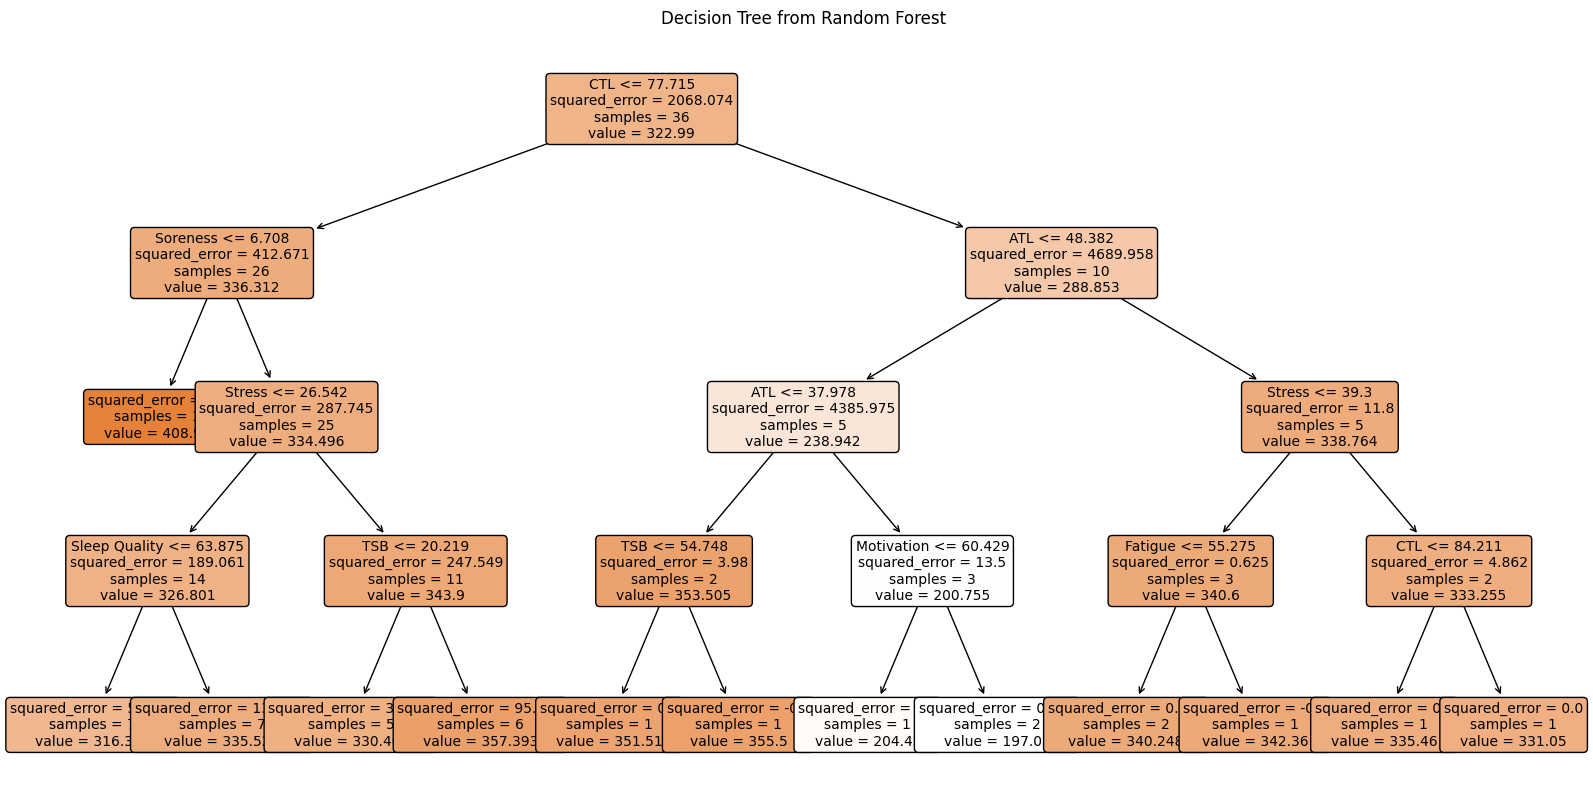

In [448]:
tree_to_plot = regressor.estimators_[0]
 
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


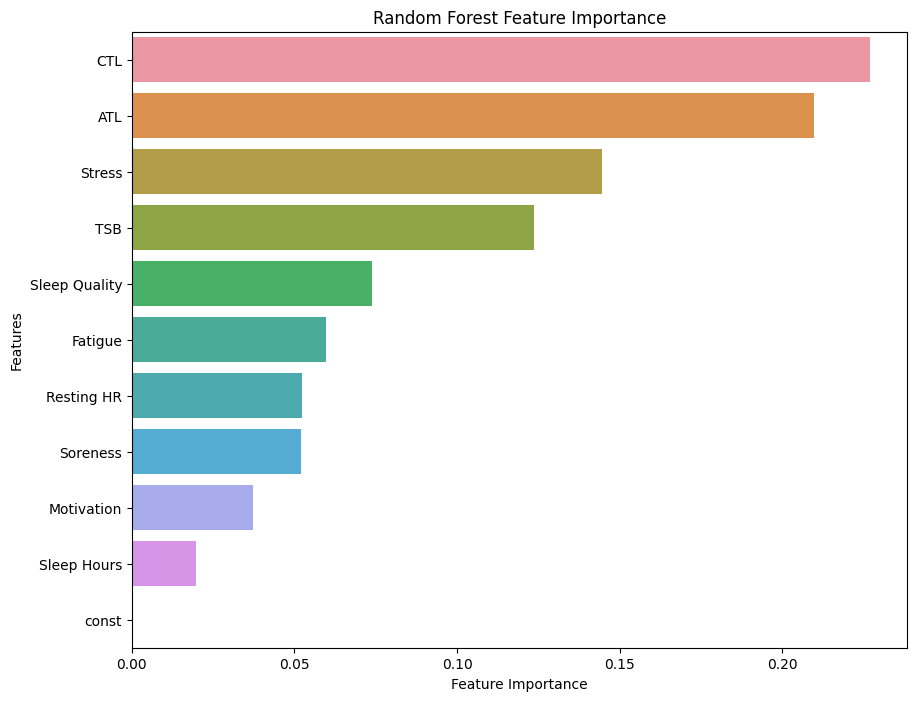

In [449]:
plot_feature_importance(regressor.feature_importances_,X.columns,'Random Forest ')

Here, the random forest's R-squared value indicates that approximately 80% of the variance in Athlete Rank can be explained by the model. The Out-of-Bag (OOB) score of -.41 would indicate that simply predicting the mean of the target value would be more accurate than the model. 

That being said, this random forest model does indicate that CTL, ATL, and Stress are the three most important features for predicting Athlete Time.

#### Attempting same process, but with 30 day aggregation

In [450]:
# Initialize an empty list to store aggregated wellness data
aggregated_wellness_data = []

# Define the subset of columns to aggregate
columns_to_aggregate = ['Stress', 'Motivation', 'Sleep Quality', 'TSB', 'Resting HR', 
                        'CTL', 'Fatigue', 'ATL', 'Sleep Hours', 'Soreness']

# Iterate over each unique athlete
for athlete in data['Athlete'].unique():
    # Iterate over each event date where 'Event_binary' is 1 for this athlete
    for event_date in data[(data['Athlete'] == athlete) & (data['Event_binary'] == 1)]['Date'].unique():
        # Filter wellness data for the previous 30 days leading up to the event date for this athlete
        filtered_wellness_data = data[(data['Athlete'] == athlete) & 
                                      (data['Date'] >= event_date - pd.Timedelta(days=30)) & 
                                      (data['Date'] <= event_date - pd.Timedelta(days=1))]
        
        # Aggregate the subset of columns for this athlete and event date
        aggregated_data = filtered_wellness_data[columns_to_aggregate].mean().to_frame().T
        aggregated_data['Athlete'] = athlete
        aggregated_data['Date'] = event_date
        
        # Append the aggregated data to the list
        aggregated_wellness_data.append(aggregated_data)

# Concatenate the aggregated wellness data into a single DataFrame
aggregated_wellness_data = pd.concat(aggregated_wellness_data).reset_index(drop=True)

In [451]:
aggregated_wellness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Stress         76 non-null     float64       
 1   Motivation     76 non-null     float64       
 2   Sleep Quality  76 non-null     float64       
 3   TSB            76 non-null     float64       
 4   Resting HR     76 non-null     float64       
 5   CTL            76 non-null     float64       
 6   Fatigue        76 non-null     float64       
 7   ATL            76 non-null     float64       
 8   Sleep Hours    76 non-null     float64       
 9   Soreness       76 non-null     float64       
 10  Athlete        77 non-null     object        
 11  Date           77 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 7.3+ KB


In [452]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        77 non-null     datetime64[ns]
 1   Athlete                     77 non-null     object        
 2   Event                       77 non-null     object        
 3   Time: Athlete               65 non-null     float64       
 4   Time: Best                  77 non-null     float64       
 5   Rank: Athlete               77 non-null     int64         
 6   Time: Athlete Heat 1        77 non-null     float64       
 7   Time: Best Heat 1           77 non-null     float64       
 8   Split Time: Athlete Heat 1  77 non-null     float64       
 9   Split Rank: Athlete Heat 1  77 non-null     int64         
 10  Time: Athlete Heat 2        63 non-null     float64       
 11  Time: Best Heat 2           63 non-null     float64       
 

In [453]:
merged_data = pd.merge(aggregated_wellness_data, results, on=['Athlete', 'Date'], how='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Stress                      76 non-null     float64       
 1   Motivation                  76 non-null     float64       
 2   Sleep Quality               76 non-null     float64       
 3   TSB                         76 non-null     float64       
 4   Resting HR                  76 non-null     float64       
 5   CTL                         76 non-null     float64       
 6   Fatigue                     76 non-null     float64       
 7   ATL                         76 non-null     float64       
 8   Sleep Hours                 76 non-null     float64       
 9   Soreness                    76 non-null     float64       
 10  Athlete                     77 non-null     object        
 11  Date                        77 non-null     datetime64[ns]
 

In [454]:
merged_data.head()

,Stress,Motivation,Sleep Quality,TSB,Resting HR,CTL,Fatigue,ATL,Sleep Hours,Soreness,...,Time: Best,Rank: Athlete,Time: Athlete Heat 1,Time: Best Heat 1,Split Time: Athlete Heat 1,Split Rank: Athlete Heat 1,Time: Athlete Heat 2,Time: Best Heat 2,Split Time: Athlete Heat 2,Split Rank: Athlete Heat 2
0,20.285714,45.238095,50.380952,34.304753,19.523810,84.532665,52.142857,50.227912,6.690476,38.476190,...,314.52,12,159.57,157.68,14.61,4,158.07,156.84,14.52,4.0
1,30.416667,41.750000,46.500000,21.446969,10.333333,70.976628,47.416667,49.529659,7.333333,34.916667,...,337.47,8,170.52,167.49,14.64,2,168.84,168.60,14.64,3.0
2,20.250000,46.500000,53.450000,40.219088,17.500000,89.182098,50.200000,48.963010,6.612500,35.300000,...,361.83,15,184.56,180.45,16.98,4,183.33,180.78,16.77,2.0
3,18.857143,45.142857,46.714286,27.100900,16.571429,76.374259,48.857143,49.273359,7.214286,36.857143,...,402.21,20,206.40,201.00,14.52,9,203.70,201.09,14.46,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,308.55,15,155.88,154.02,14.31,12,155.76,154.23,13.95,2.0


In [455]:
# Create a boolean mask indicating where NaN values exist in merged_data
nan_mask = merged_data.isna().any(axis=1)

# Filter merged_data to show only rows with NaN values
rows_with_nan = merged_data[nan_mask]
rows_with_nan[['Athlete', 'Date']]

,Athlete,Date
4,Athlete 1,2023-07-28
16,Athlete 2,2023-09-07
17,Athlete 2,2023-09-08
34,Athlete 4,2023-07-14
37,Athlete 4,2023-09-07
38,Athlete 4,2023-09-08
42,Athlete 5,2023-07-14
44,Athlete 5,2023-07-28
45,Athlete 5,2023-08-04
46,Athlete 5,2023-08-18


In [456]:
merged_data_cleaned = merged_data.dropna()

In [457]:
merged_data_cleaned.to_csv('30_day_agg.csv')

In [458]:
X = merged_data_cleaned[['Stress', 'Motivation', 'Sleep Quality', 'TSB', 'Resting HR', 'CTL', 'Fatigue', 'ATL', 'Sleep Hours', 'Soreness']]
y = merged_data_cleaned['Rank: Athlete']

In [459]:
# Add constant to the model
X = sm.add_constant(X)

# Reset the indices of X and y to ensure alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Rank: Athlete   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     2.451
Date:                Thu, 21 Mar 2024   Prob (F-statistic):             0.0207
Time:                        19:40:14   Log-Likelihood:                -194.16
No. Observations:                  62   AIC:                             408.3
Df Residuals:                      52   BIC:                             429.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.4368     12.717      1.135

Here, the R-squared is 0.29, which indicate that only 29% of the variability in Athlete Rank can be explained by the 7-day aggregation of daily wellness metrics.

The F-statistic is 2.451 with a p-value of 0.02, which is less than the standard significance level of 0.05, which would indicate that the model as a whole is statistically significant. 

Interestingly, only Resting HR and Soreness, individually, when controlling for other variables, are statistically significant when predicting Athlete Rank. None of the individual coefficients are statistically significant when controlling for the other variables. 

In [460]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=0, oob_score=True)

regressor.fit(X, y)

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.1644741520725419
Mean Squared Error: 11.331981115077719
R-squared: 0.741144904882584


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


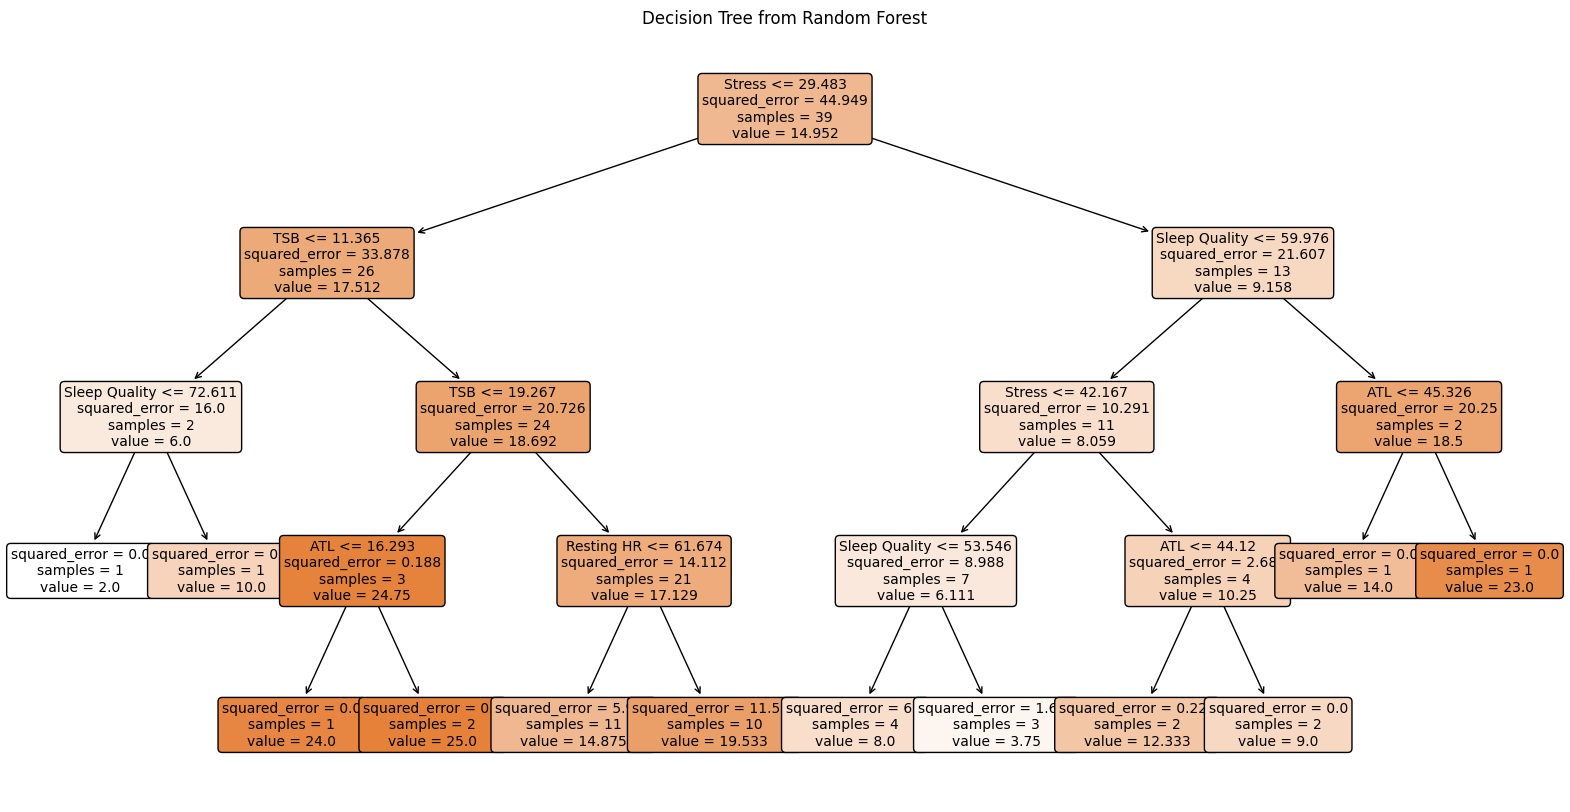

In [461]:
tree_to_plot = regressor.estimators_[0]
 
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


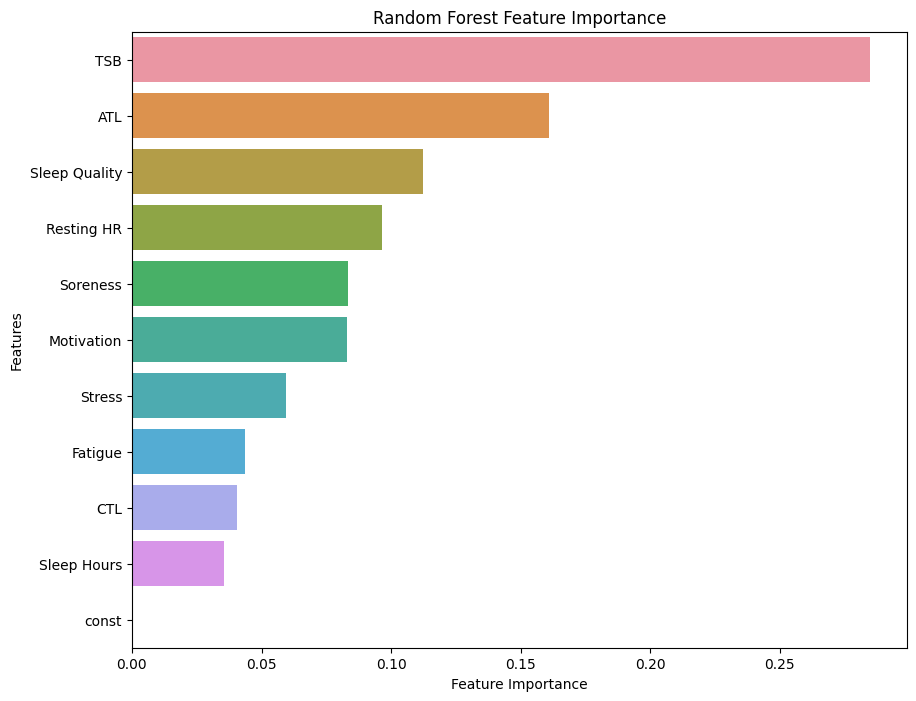

In [462]:
plot_feature_importance(regressor.feature_importances_,X.columns,'Random Forest ')

Here, the random forest's R-squared value indicates that approximately 74% of the variance in Athlete Rank can be explained by the model. The Out-of-Bag (OOB) score of -.16 would indicate that simply predicting the mean of the target value would be more accurate than the model. However, this random forest model does have a much lower mean squared error (MSE) than either of the prior models. 

This random forest model indicates that TSB is by far the most important feature for predicting Athlete Rank, followed by ATL and Sleep Quality.

In [463]:
X = merged_data_cleaned[['Stress', 'Motivation', 'Sleep Quality', 'TSB', 'Resting HR', 'CTL', 'Fatigue', 'ATL', 'Sleep Hours', 'Soreness']]
y = merged_data_cleaned['Time: Athlete']

In [464]:
# Add constant to the model
X = sm.add_constant(X)

# Reset the indices of X and y to ensure alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Time: Athlete   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.6196
Date:                Thu, 21 Mar 2024   Prob (F-statistic):              0.775
Time:                        19:40:20   Log-Likelihood:                -312.10
No. Observations:                  62   AIC:                             644.2
Df Residuals:                      52   BIC:                             665.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           368.9848     85.216      4.330

Here, the R-squared is 0.097, which indicate that only approximately 10% of the variability in Athlete Rank can be explained by the 7-day aggregation of daily wellness metrics.

The F-statistic is 0.6196 with a p-value of 0.775, which is over the standard significance level of 0.05, which would indicate that the model as a whole is not statistically significant. 

None of the coefficients are statistically significant. 

In [465]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=0, oob_score=True)

regressor.fit(X, y)

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.4778548265598479
Mean Squared Error: 402.795356669819
R-squared: 0.7364280633806937


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


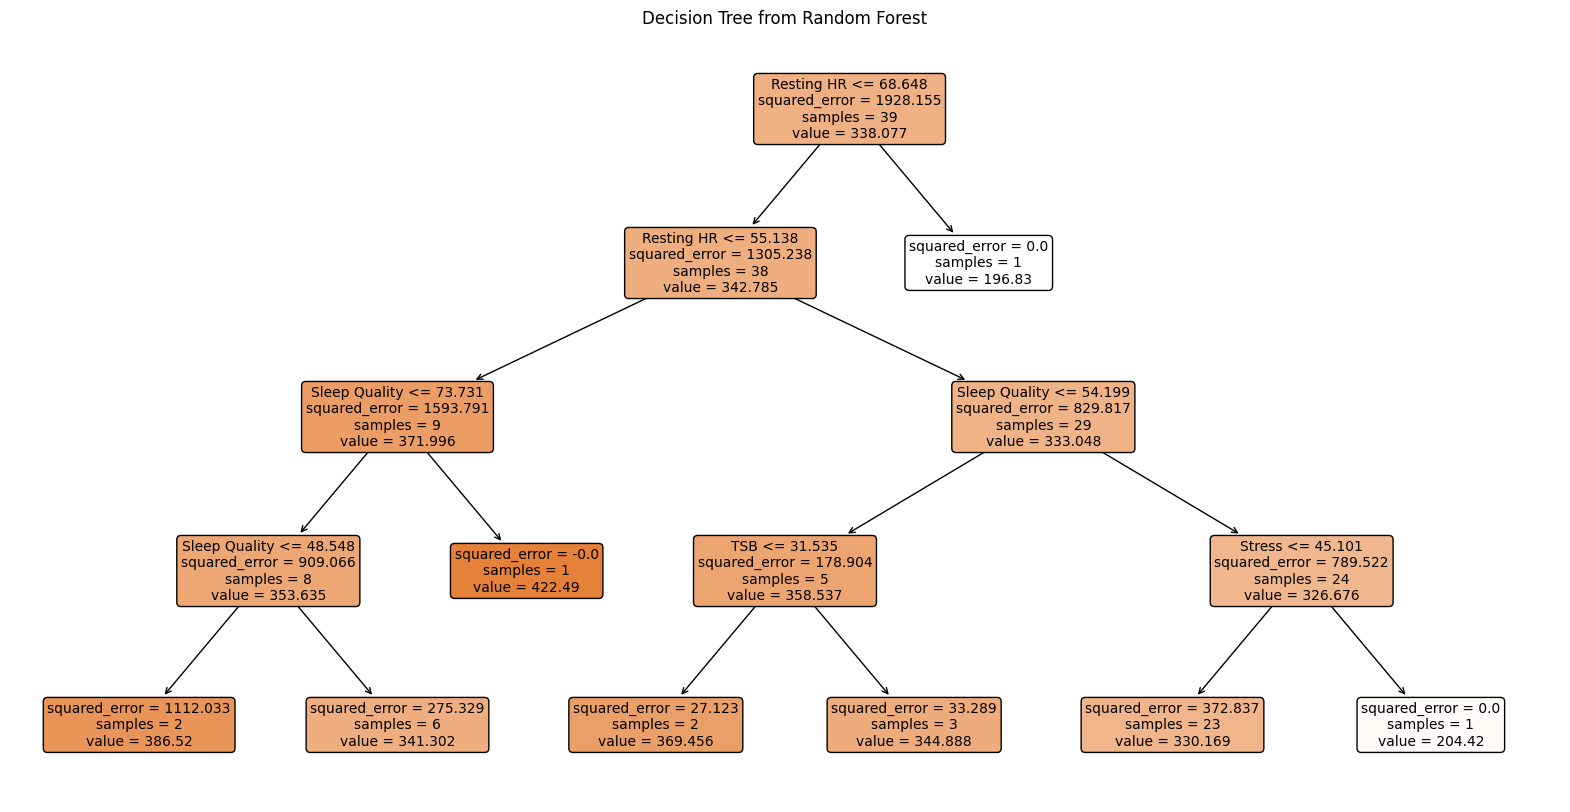

In [466]:
tree_to_plot = regressor.estimators_[0]
 
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


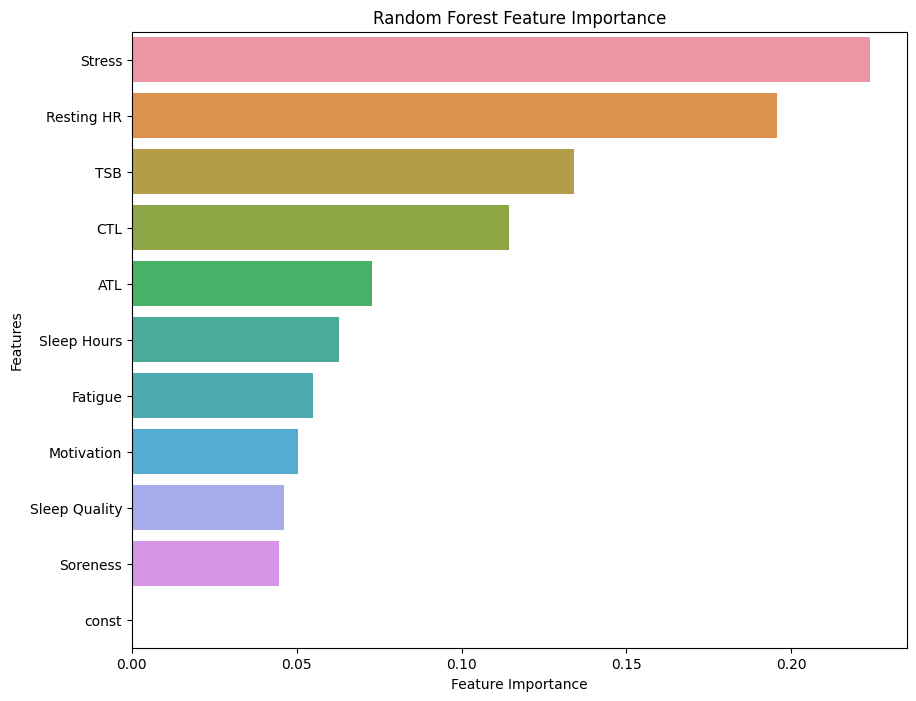

In [467]:
plot_feature_importance(regressor.feature_importances_,X.columns,'Random Forest ')

Here, the random forest's R-squared value indicates that approximately 74% of the variance in Athlete Rank can be explained by the model (which is nearly identical to the 7-day aggregation data when predicting Athlete Time). The Out-of-Bag (OOB) score of -.47 would indicate, however, that simply predicting the mean of the target value would be more accurate than the model. 

That being said, this random forest model does indicate that Stress, Resting Heart Rate, and TSB are the three most important features for predicting Athlete Rank. 

#### Attempting same process, but with no date aggregation

In [468]:
# Initialize an empty list to store aggregated wellness data
aggregated_wellness_data = []

# Define the subset of columns to aggregate
columns_to_aggregate = ['Stress', 'Motivation', 'Sleep Quality', 'TSB', 'Resting HR', 
                        'CTL', 'Fatigue', 'ATL', 'Sleep Hours', 'Soreness']

# Iterate over each unique athlete
for athlete in data['Athlete'].unique():
    # Iterate over each event date where 'Event_binary' is 1 for this athlete
    for event_date in data[(data['Athlete'] == athlete) & (data['Event_binary'] == 1)]['Date'].unique():
        # Filter wellness data for the previous 7 days leading up to the event date for this athlete
        filtered_wellness_data = data[(data['Athlete'] == athlete)]
        
        # Aggregate the subset of columns for this athlete and event date
        aggregated_data = filtered_wellness_data[columns_to_aggregate].mean().to_frame().T
        aggregated_data['Athlete'] = athlete
        aggregated_data['Date'] = event_date
        
        # Append the aggregated data to the list
        aggregated_wellness_data.append(aggregated_data)

# Concatenate the aggregated wellness data into a single DataFrame
aggregated_wellness_data = pd.concat(aggregated_wellness_data).reset_index(drop=True)

In [469]:
aggregated_wellness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Stress         77 non-null     float64       
 1   Motivation     77 non-null     float64       
 2   Sleep Quality  77 non-null     float64       
 3   TSB            77 non-null     float64       
 4   Resting HR     77 non-null     float64       
 5   CTL            77 non-null     float64       
 6   Fatigue        77 non-null     float64       
 7   ATL            77 non-null     float64       
 8   Sleep Hours    77 non-null     float64       
 9   Soreness       77 non-null     float64       
 10  Athlete        77 non-null     object        
 11  Date           77 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 7.3+ KB


In [470]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        77 non-null     datetime64[ns]
 1   Athlete                     77 non-null     object        
 2   Event                       77 non-null     object        
 3   Time: Athlete               65 non-null     float64       
 4   Time: Best                  77 non-null     float64       
 5   Rank: Athlete               77 non-null     int64         
 6   Time: Athlete Heat 1        77 non-null     float64       
 7   Time: Best Heat 1           77 non-null     float64       
 8   Split Time: Athlete Heat 1  77 non-null     float64       
 9   Split Rank: Athlete Heat 1  77 non-null     int64         
 10  Time: Athlete Heat 2        63 non-null     float64       
 11  Time: Best Heat 2           63 non-null     float64       
 

In [471]:
merged_data = pd.merge(aggregated_wellness_data, results, on=['Athlete', 'Date'], how='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Stress                      77 non-null     float64       
 1   Motivation                  77 non-null     float64       
 2   Sleep Quality               77 non-null     float64       
 3   TSB                         77 non-null     float64       
 4   Resting HR                  77 non-null     float64       
 5   CTL                         77 non-null     float64       
 6   Fatigue                     77 non-null     float64       
 7   ATL                         77 non-null     float64       
 8   Sleep Hours                 77 non-null     float64       
 9   Soreness                    77 non-null     float64       
 10  Athlete                     77 non-null     object        
 11  Date                        77 non-null     datetime64[ns]
 

In [472]:
merged_data.head()

,Stress,Motivation,Sleep Quality,TSB,Resting HR,CTL,Fatigue,ATL,Sleep Hours,Soreness,...,Time: Best,Rank: Athlete,Time: Athlete Heat 1,Time: Best Heat 1,Split Time: Athlete Heat 1,Split Rank: Athlete Heat 1,Time: Athlete Heat 2,Time: Best Heat 2,Split Time: Athlete Heat 2,Split Rank: Athlete Heat 2
0,25.020408,43.469388,52.55102,31.736531,14.653061,80.963027,48.836735,49.226495,7.188776,33.306122,...,314.52,12,159.57,157.68,14.61,4,158.07,156.84,14.52,4.0
1,25.020408,43.469388,52.55102,31.736531,14.653061,80.963027,48.836735,49.226495,7.188776,33.306122,...,337.47,8,170.52,167.49,14.64,2,168.84,168.60,14.64,3.0
2,25.020408,43.469388,52.55102,31.736531,14.653061,80.963027,48.836735,49.226495,7.188776,33.306122,...,361.83,15,184.56,180.45,16.98,4,183.33,180.78,16.77,2.0
3,25.020408,43.469388,52.55102,31.736531,14.653061,80.963027,48.836735,49.226495,7.188776,33.306122,...,402.21,20,206.40,201.00,14.52,9,203.70,201.09,14.46,6.0
4,25.020408,43.469388,52.55102,31.736531,14.653061,80.963027,48.836735,49.226495,7.188776,33.306122,...,308.55,15,155.88,154.02,14.31,12,155.76,154.23,13.95,2.0


In [473]:
# Create a boolean mask indicating where NaN values exist in merged_data
nan_mask = merged_data.isna().any(axis=1)

# Filter merged_data to show only rows with NaN values
rows_with_nan = merged_data[nan_mask]
rows_with_nan[['Athlete', 'Date']]

,Athlete,Date
16,Athlete 2,2023-09-07
17,Athlete 2,2023-09-08
34,Athlete 4,2023-07-14
37,Athlete 4,2023-09-07
38,Athlete 4,2023-09-08
42,Athlete 5,2023-07-14
44,Athlete 5,2023-07-28
45,Athlete 5,2023-08-04
46,Athlete 5,2023-08-18
52,Athlete 6,2023-07-14


In [474]:
merged_data_cleaned = merged_data.dropna()

In [475]:
merged_data_cleaned.to_csv('no_date_agg.csv')

In [476]:
X = merged_data_cleaned[['Stress', 'Motivation', 'Sleep Quality', 'TSB', 'Resting HR', 'CTL', 'Fatigue', 'ATL', 'Sleep Hours', 'Soreness']]
y = merged_data_cleaned['Rank: Athlete']

In [477]:
# Add constant to the model
X = sm.add_constant(X)

# Reset the indices of X and y to ensure alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Rank: Athlete   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     2.023
Date:                Thu, 21 Mar 2024   Prob (F-statistic):             0.0684
Time:                        19:40:26   Log-Likelihood:                -200.72
No. Observations:                  63   AIC:                             417.4
Df Residuals:                      55   BIC:                             434.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8397      0.773     -2.380

Here, the R-squared is 0.205, which indicate that only approximately 21% of the variability in Athlete Rank can be explained by the 7-day aggregation of daily wellness metrics.

The F-statistic is 2.023 with a p-value of 0.068, which is greater than the standard significance level of 0.05, which would indicate that the model as a whole is not statistically significant. 

However, TSB, CTL, Fatigue, ATL, Sleep Hours, and Soreness, individually, when controlling for other variables, are statistically significant when predicting Athlete Rank.

In [478]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=0, oob_score=True)

regressor.fit(X, y)

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.15291612927295062
Mean Squared Error: 34.80776376256519
R-squared: 0.1921029322837089


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


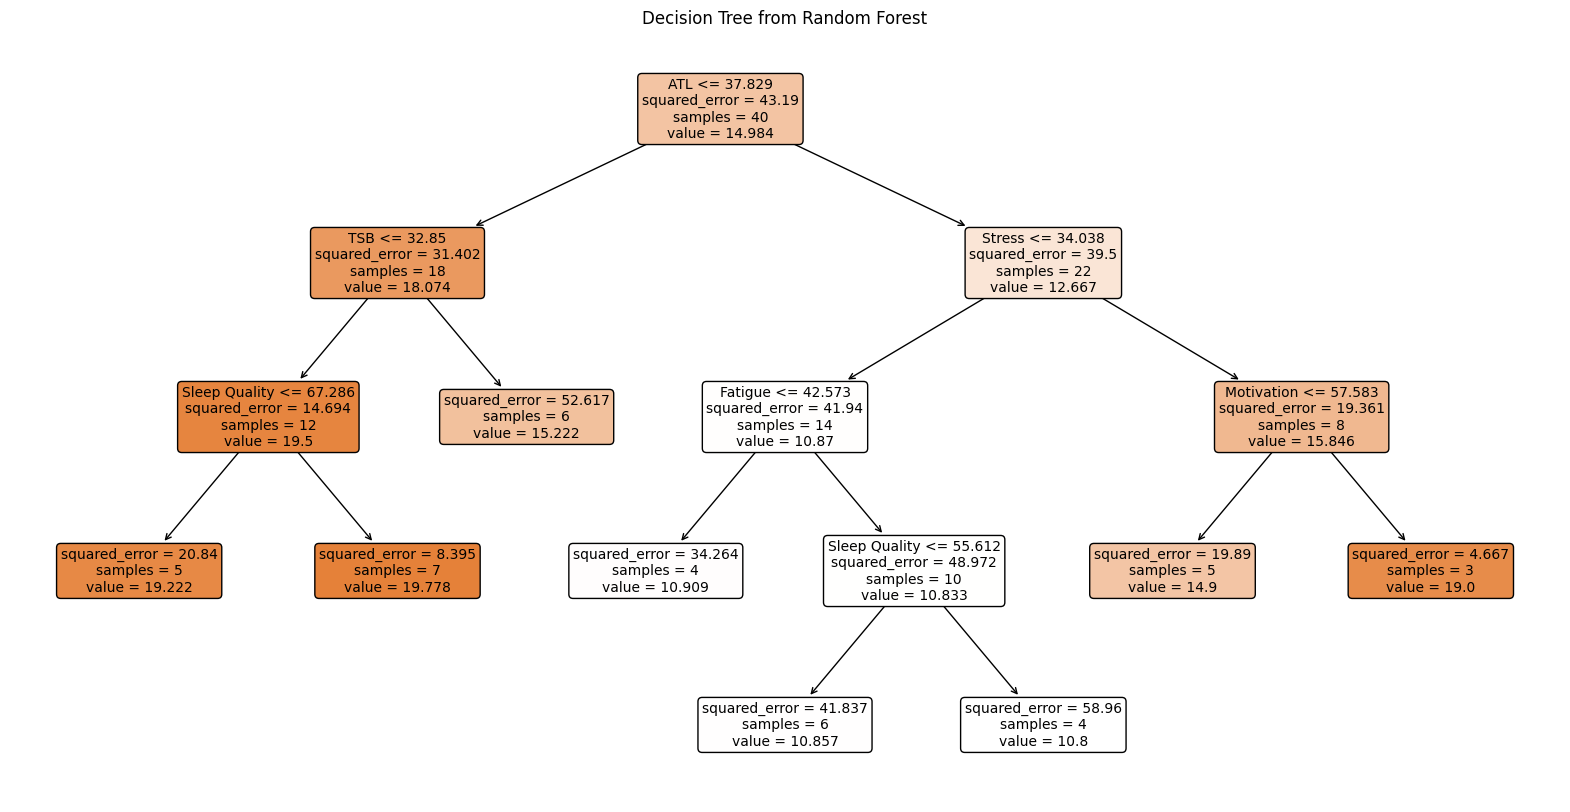

In [479]:
tree_to_plot = regressor.estimators_[0]
 
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


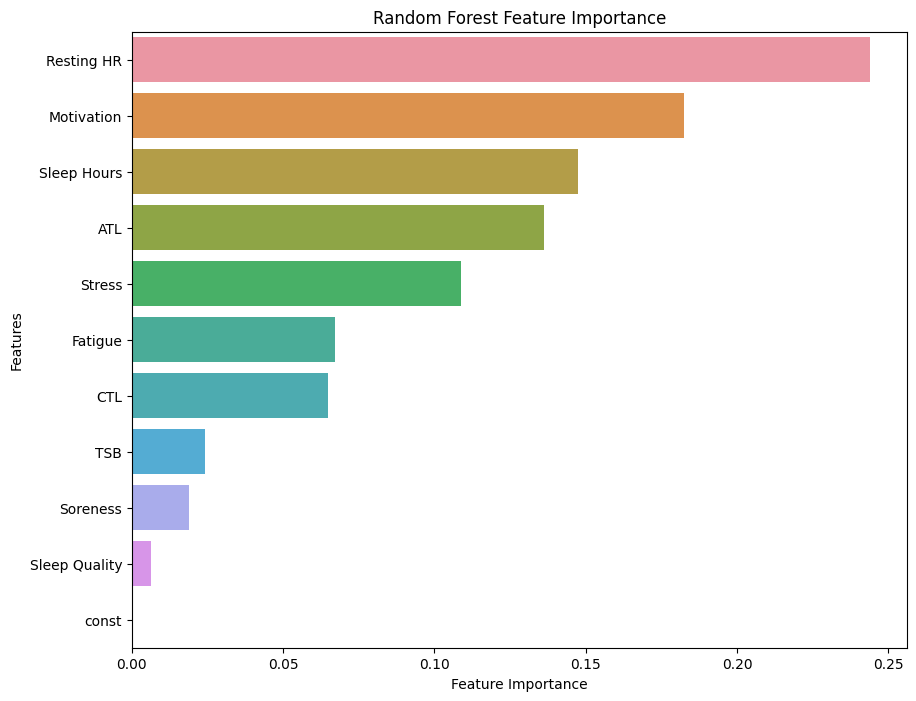

In [480]:
plot_feature_importance(regressor.feature_importances_,X.columns,'Random Forest ')

Here, the random forest's R-squared value indicates that only approximately 19% of the variance in Athlete Rank can be explained by the model. The Out-of-Bag (OOB) score of -.15 would indicate that simply predicting the mean of the target value would be more accurate than the model. By all metrics, either the 7- or 30-day aggregations of the data are more accurate when predicting for Athlete Rank than not aggregating the data at all.

That being said, this random forest model does indicate that Resting Heart Rate, Motivation, and Sleep Hours are the three most important features for predicting Athlete Rank. 

In [481]:
X = merged_data_cleaned[['Stress', 'Motivation', 'Sleep Quality', 'TSB', 'Resting HR', 'CTL', 'Fatigue', 'ATL', 'Sleep Hours', 'Soreness']]
y = merged_data_cleaned['Time: Athlete']

In [482]:
# Add constant to the model
X = sm.add_constant(X)

# Reset the indices of X and y to ensure alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Time: Athlete   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.7314
Date:                Thu, 21 Mar 2024   Prob (F-statistic):              0.646
Time:                        19:40:30   Log-Likelihood:                -317.19
No. Observations:                  63   AIC:                             650.4
Df Residuals:                      55   BIC:                             667.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1653      4.911      0.237

Here, the R-squared is 0.085, which indicate that only approximately 9% of the variability in Athlete Rank can be explained by the 7-day aggregation of daily wellness metrics.

The F-statistic is 0.7314 with a p-value of 0.646, which is over the standard significance level of 0.05, which would indicate that the model as a whole is not statistically significant. 

Stress and Resting HR, individually, when controlling for other variables, are statistically significant when predicting Athlete Rank.

In [483]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=0, oob_score=True)

regressor.fit(X, y)

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.3901814566871973
Mean Squared Error: 1405.5433303944112
R-squared: 0.06983880854397273


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


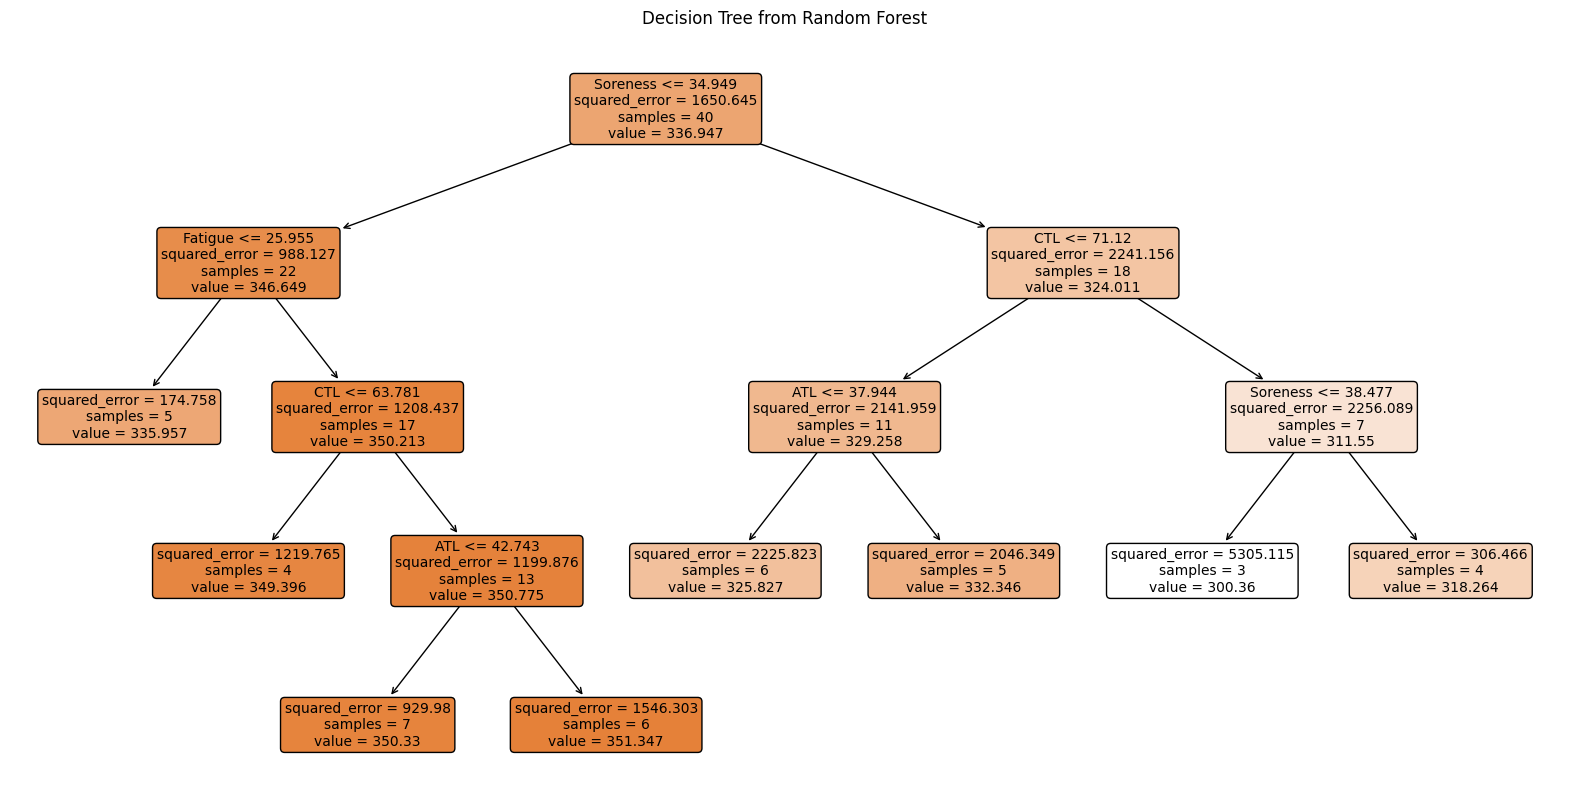

In [484]:
tree_to_plot = regressor.estimators_[0]
 
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


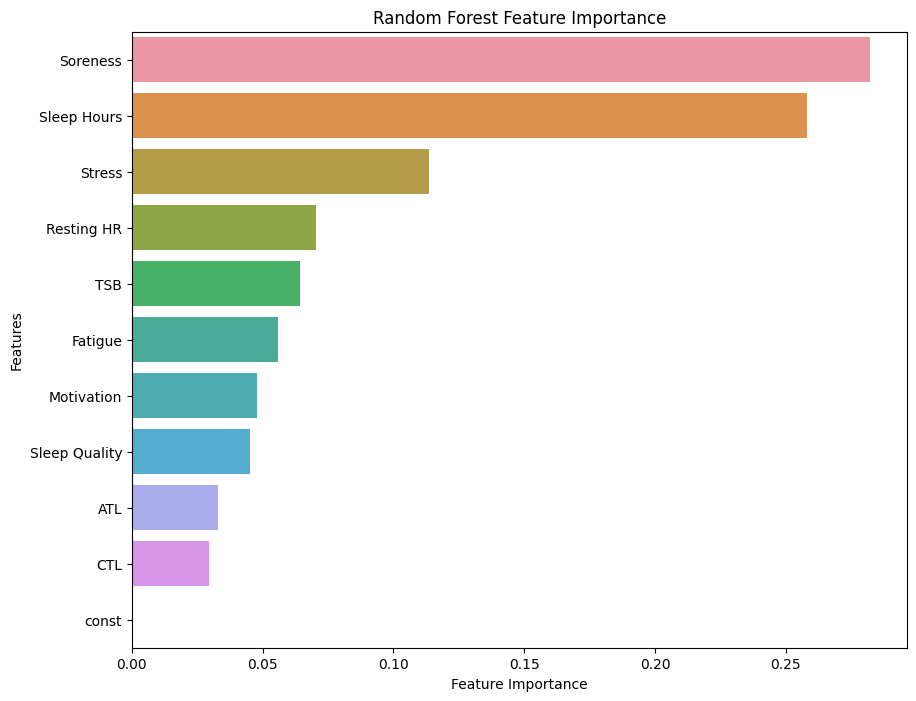

In [485]:
plot_feature_importance(regressor.feature_importances_,X.columns,'Random Forest ')

Here, the random forest's R-squared value indicates that only approximately 6% of the variance in Athlete Rank can be explained by the model. The Out-of-Bag (OOB) score of -.39 would indicate that simply predicting the mean of the target value would be more accurate than the model. The Mean Squared Error (MSE) of this model is also significantly larger than previous models, indicating, by all counts, that this model is less accurate when predicting Athlete Time than the models using data aggregated over time.

That being said, this random forest model does indicate that Soreness, Sleep Hours, and Stress are the three most important features for predicting Athlete Time.

### Conclusions 
Both multiple regression models would indicate that the 7-day aggregation of wellness data is not statistically significant when trying to predict event performance (either by rank or time). The 30-day aggregation of wellness data is only statistically significant when predicting athlete time in an event (which, due to the potential variance in event distance may be in itself an unreliable outcome). Without aggregating the data, the model is statistically significant when predicting rank, but still only explains a small amount of the variance in rank. 

The random forest models seem to perform significantly better when using 7- or 30- day aggregated data in comparison to the non-date-aggregated data. The best performing model (as measured by MSE) was the random forest model using 7-day aggregated data to predict athlete rank. This model indicated that fatigue, motivation, and acute training load (ATL) are the three most important features when predicting athlete rank. 

This can lead to several conclusions:
1. For the athlete (and coach), the numbers are not the final say. If wellness numbers seem to be poor prior to an event, the athlete can still enter the event with confidence--knowing that wellness metrics do not consistently correlate with performance outcomes.
2. For researchers (and athletes and coaches), more data should be gathered, especially as regards the mental state of athletes going into events. There may be a more definitive correlation between mental state and performance than between wellness metrics and performance. 